In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import seaborn as sns
print(sns.__version__)

0.10.1


In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
!pwd

/Users/test/codegitriz/rizvi-kth/python-cronicals/ML/Corona_Case/notebooks


In [5]:
d1_pdf = pd.read_csv("../data/wildlife.csv", encoding='latin1')

In [6]:
d1_pdf.head()

,Case,Title,Year,Region,Asia,Africa,Latin_America,Demo,Eco,Cul,Food,Policy,Live,ru_ur,Rural,trade_scale,Proximity_PA,Ethnicity
0,1,An assessment of socio-economic drivers of avi...,2016.0,Africa,0,1,0,Yes,Yes,Yes,Yes,No,No,No,No,Local,No,No
1,2,"Disentangling economic, cultural, and nutritio...",2019.0,Africa,0,1,0,Yes,Yes,Yes,Yes,No,No,No,No,Local,No,No
2,3,Economic and geographic drivers of wildlife co...,2011.0,Africa,0,4,0,No,Yes,No,Yes,No,Yes,No,No,Local,No,No
3,4,Illegal hunting of prey species in the norther...,2016.0,Asia,1,0,0,No,Yes,Yes,Yes,No,Yes,No,No,Local,No,No
4,5,Urban wild meat consumption and trade in centr...,2019.0,Latin America,0,0,1,No,Yes,No,No,No,Yes,Yes,No,Local,No,No


In [8]:
d1_pdf.columns

Index(['Case', 'Title', 'Year', 'Region ', 'Asia', 'Africa', 'Latin_America ',
       'Demo', 'Eco', 'Cul', 'Food', 'Policy', 'Live', 'ru_ur', 'Rural',
       'trade_scale', 'Proximity_PA', 'Ethnicity'],
      dtype='object')

In [ ]:
sns_plot = sns.countplot(x="Region ", hue="Demo", data=d1_pdf)
# fig = sns_plot.get_figure()
# fig.savefig("demo.png")

In [ ]:
sns_plot = sns.countplot(x="Region ", hue="Eco", data=d1_pdf)

In [ ]:
sns_plot = sns.countplot(x="Region ", hue="Cul", data=d1_pdf)

In [ ]:
sns_plot = sns.countplot(x="Region ", hue="Food", data=d1_pdf)

In [52]:
demo_pdf = d1_pdf[["Region ", "Demo"]].copy()
demo_pdf["Driver"] = "Demographic"
demo_pdf.rename(columns={"Demo": "Response"}, inplace = True)
demo_pdf.head()

,Region,Response,Driver
0,Africa,Yes,Demographic
1,Africa,Yes,Demographic
2,Africa,No,Demographic
3,Asia,No,Demographic
4,Latin America,No,Demographic


In [53]:
Eco_pdf = d1_pdf[["Region ", "Eco"]].copy()
Eco_pdf["Driver"] = "Economic"
Eco_pdf.rename(columns={"Eco": "Response"}, inplace = True)
Eco_pdf.head()

,Region,Response,Driver
0,Africa,Yes,Economic
1,Africa,Yes,Economic
2,Africa,Yes,Economic
3,Asia,Yes,Economic
4,Latin America,Yes,Economic


In [54]:
Cul_pdf = d1_pdf[["Region ", "Cul"]].copy()
Cul_pdf["Driver"] = "Cultural"
Cul_pdf.rename(columns={"Cul": "Response"}, inplace = True)
Cul_pdf.head()

,Region,Response,Driver
0,Africa,Yes,Cultural
1,Africa,Yes,Cultural
2,Africa,No,Cultural
3,Asia,Yes,Cultural
4,Latin America,No,Cultural


In [55]:
Food_pdf = d1_pdf[["Region ", "Food"]].copy()
Food_pdf["Driver"] = "Food"
Food_pdf.rename(columns={"Food": "Response"}, inplace = True)
Food_pdf.head()

,Region,Response,Driver
0,Africa,Yes,Food
1,Africa,Yes,Food
2,Africa,Yes,Food
3,Asia,Yes,Food
4,Latin America,No,Food


In [56]:
j_pdf = pd.concat([demo_pdf, Eco_pdf, Cul_pdf, Food_pdf], ignore_index = True, axis = 0 )
j_pdf

,Region,Response,Driver
0,Africa,Yes,Demographic
1,Africa,Yes,Demographic
2,Africa,No,Demographic
3,Asia,No,Demographic
4,Latin America,No,Demographic
...,...,...,...
135,Africa,No,Food
136,Asia,Yes,Food
137,Asia,No,Food
138,Africa,No,Food


In [57]:
j_pdf

,Region,Response,Driver
0,Africa,Yes,Demographic
1,Africa,Yes,Demographic
2,Africa,No,Demographic
3,Asia,No,Demographic
4,Latin America,No,Demographic
...,...,...,...
135,Africa,No,Food
136,Asia,Yes,Food
137,Asia,No,Food
138,Africa,No,Food


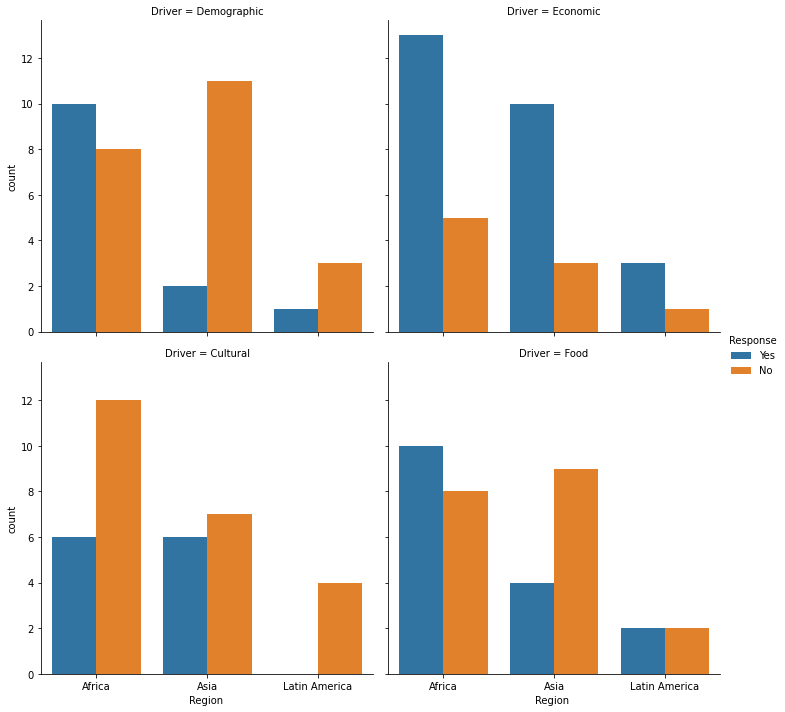

In [58]:
# g = sns.FacetGrid(j_pdf, col="Driver", height=4, aspect=.5)
# sns_plot = sns.countplot(x="Region ", hue="Response", data=j_pdf)
# g.map( sns.barplot,"Region ", "Response");

sns_plot = sns.catplot(x="Region ", hue="Response", col="Driver",
                data=j_pdf, kind="count", col_wrap=2,
                height=5, aspect=1);
# fig = sns_plot.get_figure()
sns_plot.savefig("demo.png")